# Statystyczna analiza porównawcza 
### PARAMETRÓW JAKOŚCI WODY DWÓCH BASENÓW ZALEWU WIŚLANEGO: EAST i WEST

Import potrzebnych bibliotek

In [668]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import f_oneway, kruskal, shapiro, t
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

Załadowanie danych, usunięcie pustych kolumn i dopasowanie nazw kolumn

In [669]:
east_data = pd.read_csv('./VLagun_East.csv')
west_data = pd.read_csv('./VLagun_West.csv')
east_data = east_data.dropna(axis=1, how='all')
west_data = west_data.dropna(axis=1, how='all')
east_data.columns = east_data.columns.str.replace('_E', '')
west_data.columns = west_data.columns.str.replace('_W', '')

### 1. Oblicz średnie arytmetyczne dla wszystkich zmiennych EAST i WEST

In [670]:
east_means = east_data.mean()
west_means = west_data.mean()
print('Średnie dla EAST:\n', east_means)
print('\nŚrednie dla WEST:\n', west_means)

Średnie dla EAST:
 Salinity       3.530087
O2             9.978242
Watertemp     17.181319
SS            87.982198
chla          55.123297
SRP           13.395604
DOP           22.474725
TP           168.264835
NH4N           0.030758
NO3N           0.036154
DON            0.538396
TN             1.349088
TOC           17.533224
DOC            8.031216
Windspeed      4.981319
Depth          3.171429
dtype: float64

Średnie dla WEST:
 Salinity       3.114568
O2            10.464154
Watertemp     17.586154
SS            85.474000
chla          62.054923
SRP           17.344615
DOP           22.346154
TP           177.236923
NH4N           0.027569
NO3N           0.038354
DON            0.623600
TN             1.486138
TOC           18.443195
DOC            8.451420
Windspeed      4.992308
Depth          2.816923
dtype: float64


Pytanie: wskaż zmienne, których różnice w średnich są największe.

In [671]:
mean_differences = abs(east_means - west_means)
top_mean_differences = mean_differences.sort_values(ascending=False).head(5)
print('Największe różnice w średnich\n', top_mean_differences)

Największe różnice w średnich
 TP      8.972088
chla    6.931626
SRP     3.949011
SS      2.508198
TOC     0.909971
dtype: float64


### 2. Oblicz odchylenie standardowe próby dla wszystkich zmiennych EAST i WEST

In [672]:
east_stds = east_data.std()
west_stds = west_data.std()
print('Odchylenia dla EAST:\n', east_means)
print('\nOdchylenia dla WEST:\n', west_means)

Odchylenia dla EAST:
 Salinity       3.530087
O2             9.978242
Watertemp     17.181319
SS            87.982198
chla          55.123297
SRP           13.395604
DOP           22.474725
TP           168.264835
NH4N           0.030758
NO3N           0.036154
DON            0.538396
TN             1.349088
TOC           17.533224
DOC            8.031216
Windspeed      4.981319
Depth          3.171429
dtype: float64

Odchylenia dla WEST:
 Salinity       3.114568
O2            10.464154
Watertemp     17.586154
SS            85.474000
chla          62.054923
SRP           17.344615
DOP           22.346154
TP           177.236923
NH4N           0.027569
NO3N           0.038354
DON            0.623600
TN             1.486138
TOC           18.443195
DOC            8.451420
Windspeed      4.992308
Depth          2.816923
dtype: float64


Pytanie: wskaż zmienne, których różnice w odchyleniu std. są największe.

In [673]:
std_differences = abs(east_stds - west_stds)
top_std_differences = std_differences.sort_values(ascending=False).head(5)
print('Największe różnice w odchyleniach\n', top_std_differences)

Największe różnice w odchyleniach
 SRP     6.763388
SS      5.932693
TP      3.779099
DOP     1.862870
chla    1.734608
dtype: float64


### 3. Oblicz skośność i kurtozę dla wszystkich zmiennych EAST i WEST

In [674]:
east_skewness = east_data.skew()
east_kurtosis = east_data.kurtosis()
west_skewness = west_data.skew()
west_kurtosis = west_data.kurtosis()
print('Skośności zmiennych EAST\n', east_skewness)
print('Kurtozy zmiennych EAST\n', east_kurtosis)
print('Skośności zmiennych WEST\n', west_skewness)
print('Kurtozy zmiennych WEST\n', west_kurtosis)

Skośności zmiennych EAST
 Salinity    -0.468389
O2           0.768448
Watertemp   -0.804684
SS           0.790276
chla         0.637567
SRP          1.073793
DOP          1.529041
TP           0.252256
NH4N         2.043296
NO3N         2.737387
DON         -0.772556
TN          -0.518883
TOC          0.189628
DOC          0.897008
Windspeed    0.343515
Depth       -1.284537
dtype: float64
Kurtozy zmiennych EAST
 Salinity     -0.496153
O2            0.405186
Watertemp    -0.538879
SS            0.709148
chla          0.626714
SRP           1.289588
DOP           1.537058
TP           -0.236663
NH4N          4.913768
NO3N         11.811096
DON           0.803576
TN           -0.140500
TOC           0.088340
DOC          -0.011077
Windspeed     0.061598
Depth         1.508923
dtype: float64
Skośności zmiennych WEST
 Salinity    -0.391659
O2           0.452279
Watertemp   -1.031707
SS           0.764426
chla         0.250884
SRP          2.305632
DOP          1.306468
TP           0.43118

Pytanie: Znajdź zmienne, które nie maja rozkładu normalnego (skew > 3 i kurtrosis > 10)

In [675]:
non_normal_east = east_data.columns[(east_skewness > 3) | (east_kurtosis > 10)]
non_normal_west = west_data.columns[(west_skewness > 3) | (west_kurtosis > 10)]
print('Zmienne bez rozkładu normalnego w EAST:\n', non_normal_east.values)
print('Zmienne bez rozkładu normalnego w WEST:\n', non_normal_west.values)

Zmienne bez rozkładu normalnego w EAST:
 ['NO3N']
Zmienne bez rozkładu normalnego w WEST:
 ['NH4N']


### 4. Przeprowadź test na normalność rozkładu Shapiro-Wilka dla wszystkich zmiennych EAST i WEST

In [676]:
shapiro_east = east_data.apply(lambda x: shapiro(x)[1])
shapiro_west = west_data.apply(lambda x: shapiro(x)[1])

Sprawdź, czy ocena normalności rozkładu jest taka sama jak po obliczeniu skośności i kurtozy.

In [677]:
normal_shapiro_east = shapiro_east[shapiro_east > 0.05].index.tolist()
normal_shapiro_west = shapiro_west[shapiro_west > 0.05].index.tolist()
non_normal_shapiro_east = shapiro_east[shapiro_east <= 0.05].index.tolist()
non_normal_shapiro_west = shapiro_west[shapiro_west <= 0.05].index.tolist()
print('Zmienne bez rozkładu normalnego w EAST:\n', non_normal_shapiro_east)
print('Zmienne bez rozkładu normalnego w WEST:\n', non_normal_shapiro_west)

Zmienne bez rozkładu normalnego w EAST:
 ['Salinity', 'O2', 'Watertemp', 'SS', 'chla', 'SRP', 'DOP', 'NH4N', 'NO3N', 'DON', 'DOC', 'Depth']
Zmienne bez rozkładu normalnego w WEST:
 ['O2', 'Watertemp', 'SS', 'SRP', 'DOP', 'NH4N', 'NO3N', 'TN', 'Depth']


Dla zmiennych NO3N w EAST i NH4N w WEST jest faktycznie taka sama, ale jednak test Shapiro-Wilka znalazł dużo więcej zmiennych bez rozkładu normalnego.

### 5. Przeprowadź dla par tych samych zmiennych dla zbiorów EAST i WEST test ANOVA dla z par zmiennych o rozkładzie normalnym i test Kruskala-Wallisa dla par zmiennych, w których obie zmienne mają rozkład inny niż Gaussa, lub jedna ze zmiennych ma taki rozkład.

In [678]:
anova_results = {}
kruskal_results = {}

for column in east_data.columns:
    east_vals = east_data[column]
    west_vals = west_data[column]
    if column in normal_shapiro_east and column in normal_shapiro_west:
        anova_results[column] = f_oneway(east_vals, west_vals).pvalue
    else:
        kruskal_results[column] = kruskal(east_vals, west_vals).pvalue

anova_df = pd.DataFrame(list(anova_results.items()), columns=['column', 'p-value']).set_index('column')
kruskal_df = pd.DataFrame(list(kruskal_results.items()), columns=['column', 'p-value']).set_index('column')

print('Test ANOVA dla par zmiennych o rozkładzie normalnym:\n', anova_df)
print('\nTest Kruskala-Wallisa dla pozostałych par zmiennych:\n', kruskal_df)

Test ANOVA dla par zmiennych o rozkładzie normalnym:
             p-value
column             
TP         0.286671
TOC        0.071637
Windspeed  0.979503

Test Kruskala-Wallisa dla pozostałych par zmiennych:
             p-value
column             
Salinity   0.001037
O2         0.004538
Watertemp  0.367638
SS         0.843261
chla       0.161839
SRP        0.262780
DOP        0.798544
NH4N       0.602036
NO3N       0.716419
DON        0.001638
TN         0.019934
DOC        0.003164
Depth      0.000030


Pytanie: Średnie których (tych samych) zmiennych z obu zbiorów EAST i WEST różnią się istotnie (p <0.05)?

In [679]:
significant_anova = {s: p for s, p in anova_results.items() if p < 0.05}
significant_kruskal = {s: p for s, p in kruskal_results.items() if p < 0.05}

significant_anova_df = pd.DataFrame(list(significant_anova.items()), columns=['column', 'p-value']).set_index('column')
significant_kruskal_df = pd.DataFrame(list(significant_kruskal.items()), columns=['column', 'p-value']).set_index('column')

print(significant_anova_df)
print(significant_kruskal_df)

Empty DataFrame
Columns: [p-value]
Index: []
           p-value
column            
Salinity  0.001037
O2        0.004538
DON       0.001638
TN        0.019934
DOC       0.003164
Depth     0.000030


Istotnie różnią się średnie Salinity, O2, DON, TN, DOC oraz Depth.

### 6. Utwórz i zwizualizuj macierze korelacji Pearsona dla zbiorów EAST i WEST.

In [680]:
east_corr = east_data.corr(method='pearson')
west_corr = west_data.corr(method='pearson')

In [681]:
def draw_matrix_heatmap(matrix, title):
    plt.figure(figsize=(12, 10))
    sns.heatmap(matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
    plt.title(title)
    plt.show()

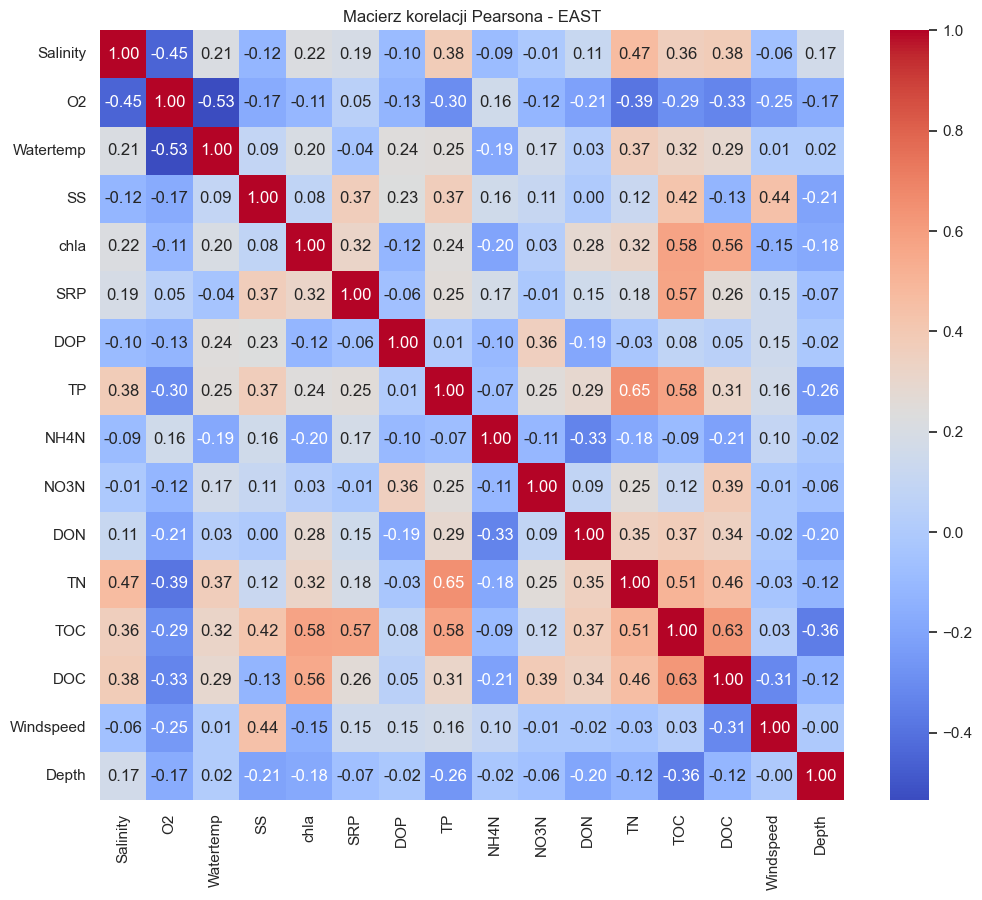

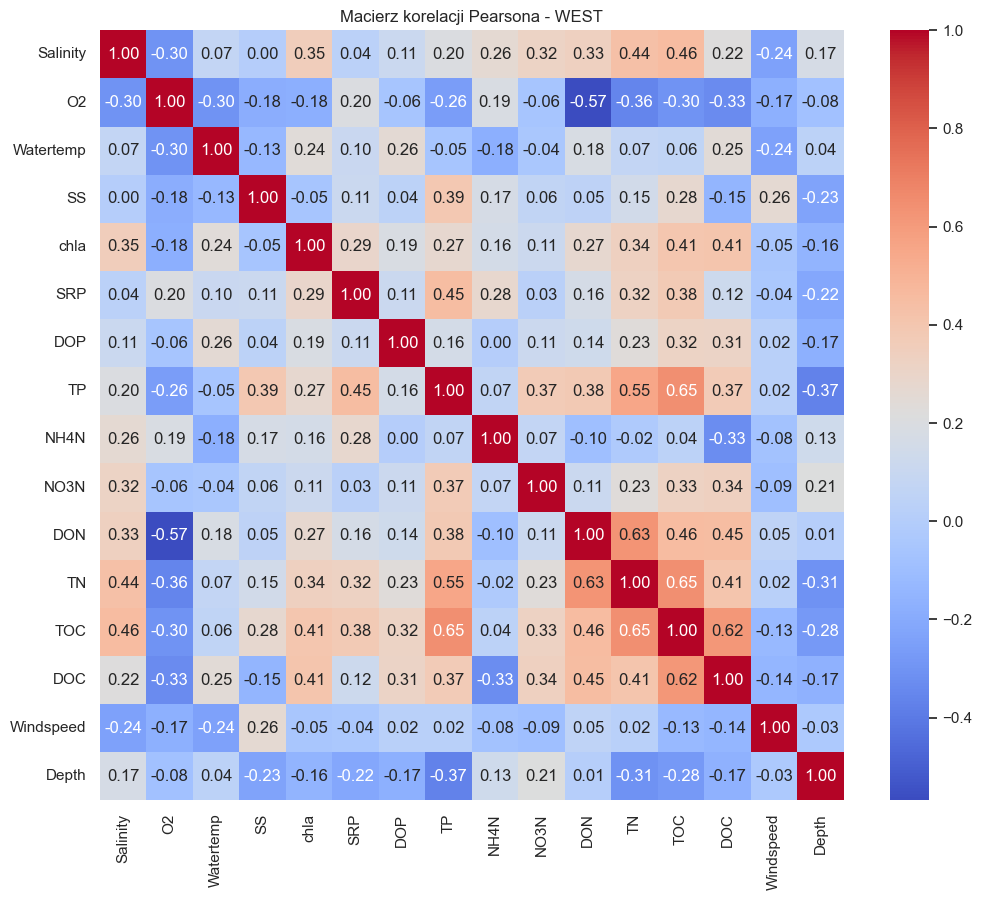

In [682]:
draw_matrix_heatmap(east_corr, 'Macierz korelacji Pearsona - EAST')
draw_matrix_heatmap(west_corr, 'Macierz korelacji Pearsona - WEST')

Pytanie: Które pary zmiennych mają najwyższe współczynniki korelacji w obu zbiorach? Czy w zbiorach EAST i WEST te pary zmiennych są takie same, czy inne?

In [683]:
def find_highest_correlations(matrix):
    corr_pairs = (
        matrix.where(~matrix.isna())
        .stack()
        .reset_index()
    )
    corr_pairs.columns = ['One', 'Two', 'Correlation']
    corr_pairs = corr_pairs[corr_pairs['One'] != corr_pairs['Two']]
    corr_pairs['AbsCorrelation'] = corr_pairs['Correlation'].abs()
    highest_corr = corr_pairs.sort_values(by='AbsCorrelation', ascending=False).head(1)
    return highest_corr


east_highest_corr = find_highest_correlations(east_corr)
west_highest_corr = find_highest_correlations(west_corr)

In [684]:
east_highest_corr

,One,Two,Correlation,AbsCorrelation
183,TN,TP,0.650506,0.650506


In [685]:
west_highest_corr

,One,Two,Correlation,AbsCorrelation
199,TOC,TP,0.646775,0.646775


Najwyższe współczynniki korelacji w zbiorze EAST ma para TN i TP, natomiast w zbiorze WEST TOC + TP. Są więc to inne pary, za to jedna zmienna się w nich powtarza.

### 7. Zbuduj po dwa analogiczne modele regresji wielokrotnej dla zbiorów EAST i WEST oparte na tej samej zmiennej zależnej (chla) i kilku (>4) zmiennych niezależnych: w pierwszym modelu na zmiennych parametrów fizycznych (Watertemp, O2, SS, Salinity, Windspeed, depth) i w drugim na zmiennych parametrów chemicznych (SRP, DOP, TP, NH4N, NO3N, DON, TN, TOC, DOC). Wylicz współczynnik korelacji R i przeanalizuj poziomy istotności wag regresji beta.

In [686]:
def perform_regression(data, dependent_var, independent_vars):
    X = data[independent_vars].dropna()
    y = data[dependent_var].dropna()
    common_index = X.index.intersection(y.index)
    X, y = X.loc[common_index], y.loc[common_index]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Obliczanie istotności wag beta
    params = np.append(model.intercept_, model.coef_)
    predictions = np.dot(np.c_[np.ones((X_train.shape[0], 1)), X_train], params)
    residuals = y_train - predictions
    var_beta = np.linalg.inv(np.dot(np.c_[np.ones((X_train.shape[0], 1)), X_train].T, np.c_[np.ones((X_train.shape[0], 1)), X_train])) * np.var(residuals, ddof=X_train.shape[1])
    std_errors = np.sqrt(np.diag(var_beta))
    t_values = params / std_errors
    p_values = [2 * (1 - t.cdf(np.abs(i), df=X_train.shape[0] - 1)) for i in t_values]

    return r2, mse, model.coef_, model.intercept_, p_values[1:]

In [687]:
def create_regression_table(r2, mse, beta, p_values, variables, model_type):
    data = {
        'Variable': variables,
        'Beta Coefficients': beta,
        'p-values': p_values
    }
    df = pd.DataFrame(data)
    df.loc['Overall'] = [f'{model_type} Model', f'R2: {r2:.3f}', f'MSE: {mse:.3f}']
    return df

In [688]:
physical_cols = ['Watertemp', 'O2', 'SS', 'Salinity', 'Windspeed', 'Depth']
chemical_cols = ['SRP', 'DOP', 'TP', 'NH4N', 'NO3N', 'DON', 'TN', 'TOC', 'DOC']

In [689]:
r2_physical_east, mse_physical_east, beta_physical_east, intercept_physical_east, p_values_physical_east = perform_regression(east_data, 'chla', physical_cols)
r2_chemical_east, mse_chemical_east, beta_chemical_east, intercept_chemical_east, p_values_chemical_east = perform_regression(east_data, 'chla', chemical_cols)
regression_physical_east = create_regression_table(r2_physical_east, mse_physical_east, beta_physical_east, p_values_physical_east, physical_cols, 'Physical')
regression_chemical_east = create_regression_table(r2_chemical_east, mse_chemical_east, beta_chemical_east, p_values_chemical_east, chemical_cols, 'Chemical')

In [690]:
r2_physical_west, mse_physical_west, beta_physical_west, intercept_physical_west, p_values_physical_west = perform_regression(west_data, 'chla', physical_cols)
r2_chemical_west, mse_chemical_west, beta_chemical_west, intercept_chemical_west, p_values_chemical_west = perform_regression(west_data, 'chla', chemical_cols)
regression_physical_west = create_regression_table(r2_physical_west, mse_physical_west, beta_physical_west, p_values_physical_west, physical_cols, 'Physical')
regression_chemical_west = create_regression_table(r2_chemical_west, mse_chemical_west, beta_chemical_west, p_values_chemical_west, chemical_cols, 'Chemical')

In [691]:
print('Regresja wielokrotna dla EAST - fizyczne')
regression_physical_east

Regresja wielokrotna dla EAST - fizyczne


,Variable,Beta Coefficients,p-values
0,Watertemp,2.187181,0.211585
1,O2,0.946208,0.876937
2,SS,0.070463,0.588068
3,Salinity,11.434546,0.116859
4,Windspeed,-2.058586,0.259539
5,Depth,-8.114504,0.41985
Overall,Physical Model,R2: 0.226,MSE: 640.629


Zmienne fizyczne EAST:  
Żadne współczynniki beta nie osiągnęły istotności statystycznej (wszystkie p-values są większe od 0.05), co wskazuje na brak istotności statystycznej każdej zmiennej fizycznej w zbiorze EAST na zmienność chla.

In [692]:
print('Regresja wielokrotna dla EAST - chemiczne')
regression_chemical_east

Regresja wielokrotna dla EAST - chemiczne


,Variable,Beta Coefficients,p-values
0,SRP,-0.064082,0.905218
1,DOP,-0.297389,0.157629
2,TP,-0.058876,0.610296
3,NH4N,-282.958662,0.16399
4,NO3N,-89.692531,0.720752
5,DON,-18.276697,0.535392
6,TN,2.304752,0.870299
7,TOC,5.018667,0.055053
8,DOC,8.52915,0.156757
Overall,Chemical Model,R2: 0.573,MSE: 353.879


Zmienne chemiczne EAST:  
Żadne współczynniki beta nie osiągnęły istotności statystycznej (wszystkie p-values są większe od 0.05), co wskazuje na brak istotności statystycznej każdej zmiennej chemicznej w zbiorze EAST na zmienność chla. Zmienna TOC jest blisko granicy istotności (p-value = 0.055).

In [693]:
print('Regresja wielokrotna dla WEST - fizyczne')
regression_physical_west

Regresja wielokrotna dla WEST - fizyczne


,Variable,Beta Coefficients,p-values
0,Watertemp,2.514999,0.168776
1,O2,0.481221,0.931857
2,SS,-0.083943,0.626183
3,Salinity,26.248956,0.001604
4,Windspeed,2.853808,0.208744
5,Depth,-12.648296,0.127687
Overall,Physical Model,R2: -0.343,MSE: 943.884


Zmienne fizyczne WEST:  
Jedna zmienna fizyczna osiągnęła istotność statystyczną: Salinity (p-value = 0.0016). Oznacza to, że zasolenie w zbiorze WEST jest istotnym predyktorem zmienności chla.

In [694]:
print('Regresja wielokrotna dla WEST - chemiczne')
regression_chemical_west

Regresja wielokrotna dla WEST - chemiczne


,Variable,Beta Coefficients,p-values
0,SRP,0.272222,0.456
1,DOP,0.032322,0.916101
2,TP,-0.06938,0.671839
3,NH4N,704.247006,0.054838
4,NO3N,-215.329939,0.471878
5,DON,9.996477,0.797058
6,TN,11.55463,0.577977
7,TOC,1.387889,0.655365
8,DOC,12.928491,0.11411
Overall,Chemical Model,R2: 0.212,MSE: 553.671


Zmienne chemiczne WEST:  
Żadne współczynniki beta nie osiągnęły istotności statystycznej (wszystkie p-values są większe od 0.05), co wskazuje na brak istotności statystycznej każdej zmiennej chemicznej w zbiorze EAST na zmienność chla. Zmienna NH4N jest blisko granicy istotności (p-value = 0.054).

Pytanie: Jakie są różnice w wyjaśnieniu zmienności chlorofilu a (chla) pomiędzy zbiorami EAST i WEST przez zmienne fizyczne i chemiczne?

W zbiorze EAST zmienne chemiczne dominują w wyjaśnianiu zmienności chlorofilu a, co odzwierciedla wyższy R2 (0.573) oraz graniczne istotności dla TOC. W zbiorze WEST zmienne fizyczne nie wyjaśniają zmienności chlorofilu (ujemny R2), ale Salinity jest jedyną zmienną istotną statystycznie. W zmiennych chemicznych NH4N osiąga graniczną istotność.

### 8. Przeprowadź analizę głównych składowych (PCA) według Ćw. 7_PCA (bez wykresów 3D), osobno dla zbiorów basenów EAST i WEST.

PCA dla EAST

In [695]:
east_data_sc = StandardScaler().fit_transform(east_data)
pd.DataFrame(east_data_sc, columns=east_data.columns).head(6)

,Salinity,O2,Watertemp,SS,chla,SRP,DOP,TP,NH4N,NO3N,DON,TN,TOC,DOC,Windspeed,Depth
0,0.321115,-0.498746,0.357828,-0.953515,-0.491681,-1.182489,-0.532462,0.641354,0.429268,-0.705507,0.077314,0.064342,-0.465652,-0.533690,-0.587829,0.282115
1,-0.035818,-0.084922,0.613720,-1.006514,-0.287894,-1.074943,-0.245840,-0.704207,-0.560338,-0.555970,-2.547977,-0.000258,-0.365749,-0.172014,-1.976728,0.940383
2,0.270125,-0.335141,0.101935,-0.688519,-1.001304,-0.202619,-0.468219,-0.521452,0.273015,-0.755353,1.156872,-1.265841,-0.484491,-0.498527,-0.389415,0.062692
3,1.238944,-0.421756,0.389814,-0.874016,-1.307141,-0.716453,-0.310083,-0.400954,-0.404084,-0.605816,0.169321,0.466627,-0.491341,-0.752705,-0.587829,-0.376153
4,1.213449,-0.614232,0.197895,-0.927015,-1.612977,0.048324,-0.053110,-0.977335,0.012592,-0.306742,-3.167497,-0.578726,-0.724259,-0.664295,-0.389415,1.159806
5,0.729039,-0.633479,0.229882,-1.006514,-1.612977,-0.561108,-0.319966,-0.346730,1.523044,-1.453191,0.353337,-0.264533,-0.696857,-0.984781,-0.389415,0.720960


In [696]:
pca = PCA(n_components=3)
pca_features = pca.fit_transform(east_data_sc)

print('Shape before PCA: ', east_data.shape)
print('Shape after PCA: ', pca_features.shape)

Shape before PCA:  (91, 16)
Shape after PCA:  (91, 3)


In [697]:
pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2', 'PC3'])
pca_df

,PC1,PC2,PC3
0,-0.562972,-1.062387,-0.499814
1,-1.510121,-2.006632,-0.929876
2,-1.179867,-0.710533,0.138185
3,-0.544679,-1.219939,-0.698476
4,-2.104925,-0.650858,-1.724126
...,...,...,...
86,1.104482,2.074278,-0.291229
87,-0.277046,1.808314,0.051099
88,0.423635,1.217935,-0.995356
89,0.083809,1.979086,-0.932005


In [698]:
explained_variance = pca.explained_variance_
print(f'Explained Variance Ratios: {explained_variance}')

Explained Variance Ratios: [4.33993203 2.05761065 1.85470721]


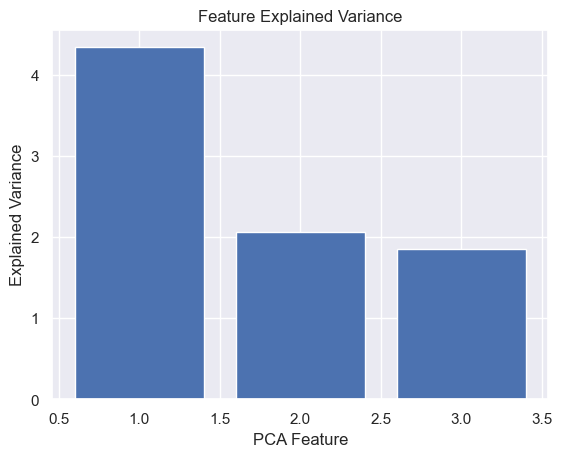

In [699]:
sns.set()

pca = PCA(n_components=3)
pca.fit_transform(east_data_sc)

plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('PCA Feature')
plt.ylabel('Explained Variance')
plt.title('Feature Explained Variance')
plt.show()

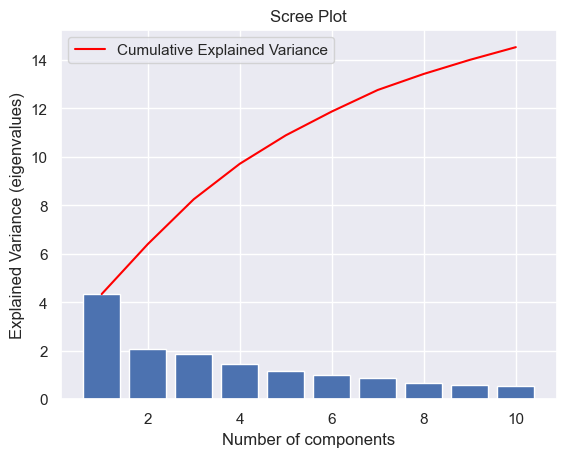

In [700]:
pca = PCA(n_components=10)
pca.fit_transform(east_data_sc)
explained_variance = pca.explained_variance_

plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), c='red', label='Cumulative Explained Variance')
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained Variance (eigenvalues)')
plt.title('Scree Plot')
plt.show()

In [701]:
loadings = pca.components_
n_features = pca.n_features_in_
feature_names = list(east_data.columns)

pc_list = [f'PC{i}' for i in list(range(1, n_features - 1))]
pc_loadings = dict(zip(pc_list, loadings))

loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
feature_names,,,,,,,,,,
Salinity,0.258866,-0.194997,-0.085793,-0.446368,-0.174680,0.193269,0.044064,-0.331547,-0.403291,0.123594
O2,-0.257566,0.031966,0.425387,0.288741,-0.112415,0.137218,0.060681,-0.363895,0.216886,-0.035350
Watertemp,0.235544,-0.060630,-0.389941,-0.001701,-0.076737,-0.237361,-0.471738,0.177274,0.292571,-0.257591
SS,0.143797,0.575139,-0.031914,0.025317,0.042740,-0.115165,0.000183,-0.032206,0.270727,-0.078212
chla,0.290837,-0.117026,0.279368,0.064610,-0.117648,-0.408834,-0.092313,0.030677,0.233224,0.547510
SRP,0.204762,0.277346,0.337751,-0.152893,-0.315079,-0.183440,0.341511,-0.078986,0.022615,-0.309792
DOP,0.036357,0.194029,-0.418120,0.407451,-0.239584,-0.174830,0.061377,-0.319739,-0.372137,-0.203620
TP,0.348753,0.173704,-0.010222,-0.059721,0.155846,0.424591,-0.063390,-0.250311,0.186335,0.055331
NH4N,-0.125192,0.302695,0.143925,-0.214484,-0.441539,0.353815,-0.203081,0.538603,-0.121781,-0.060523


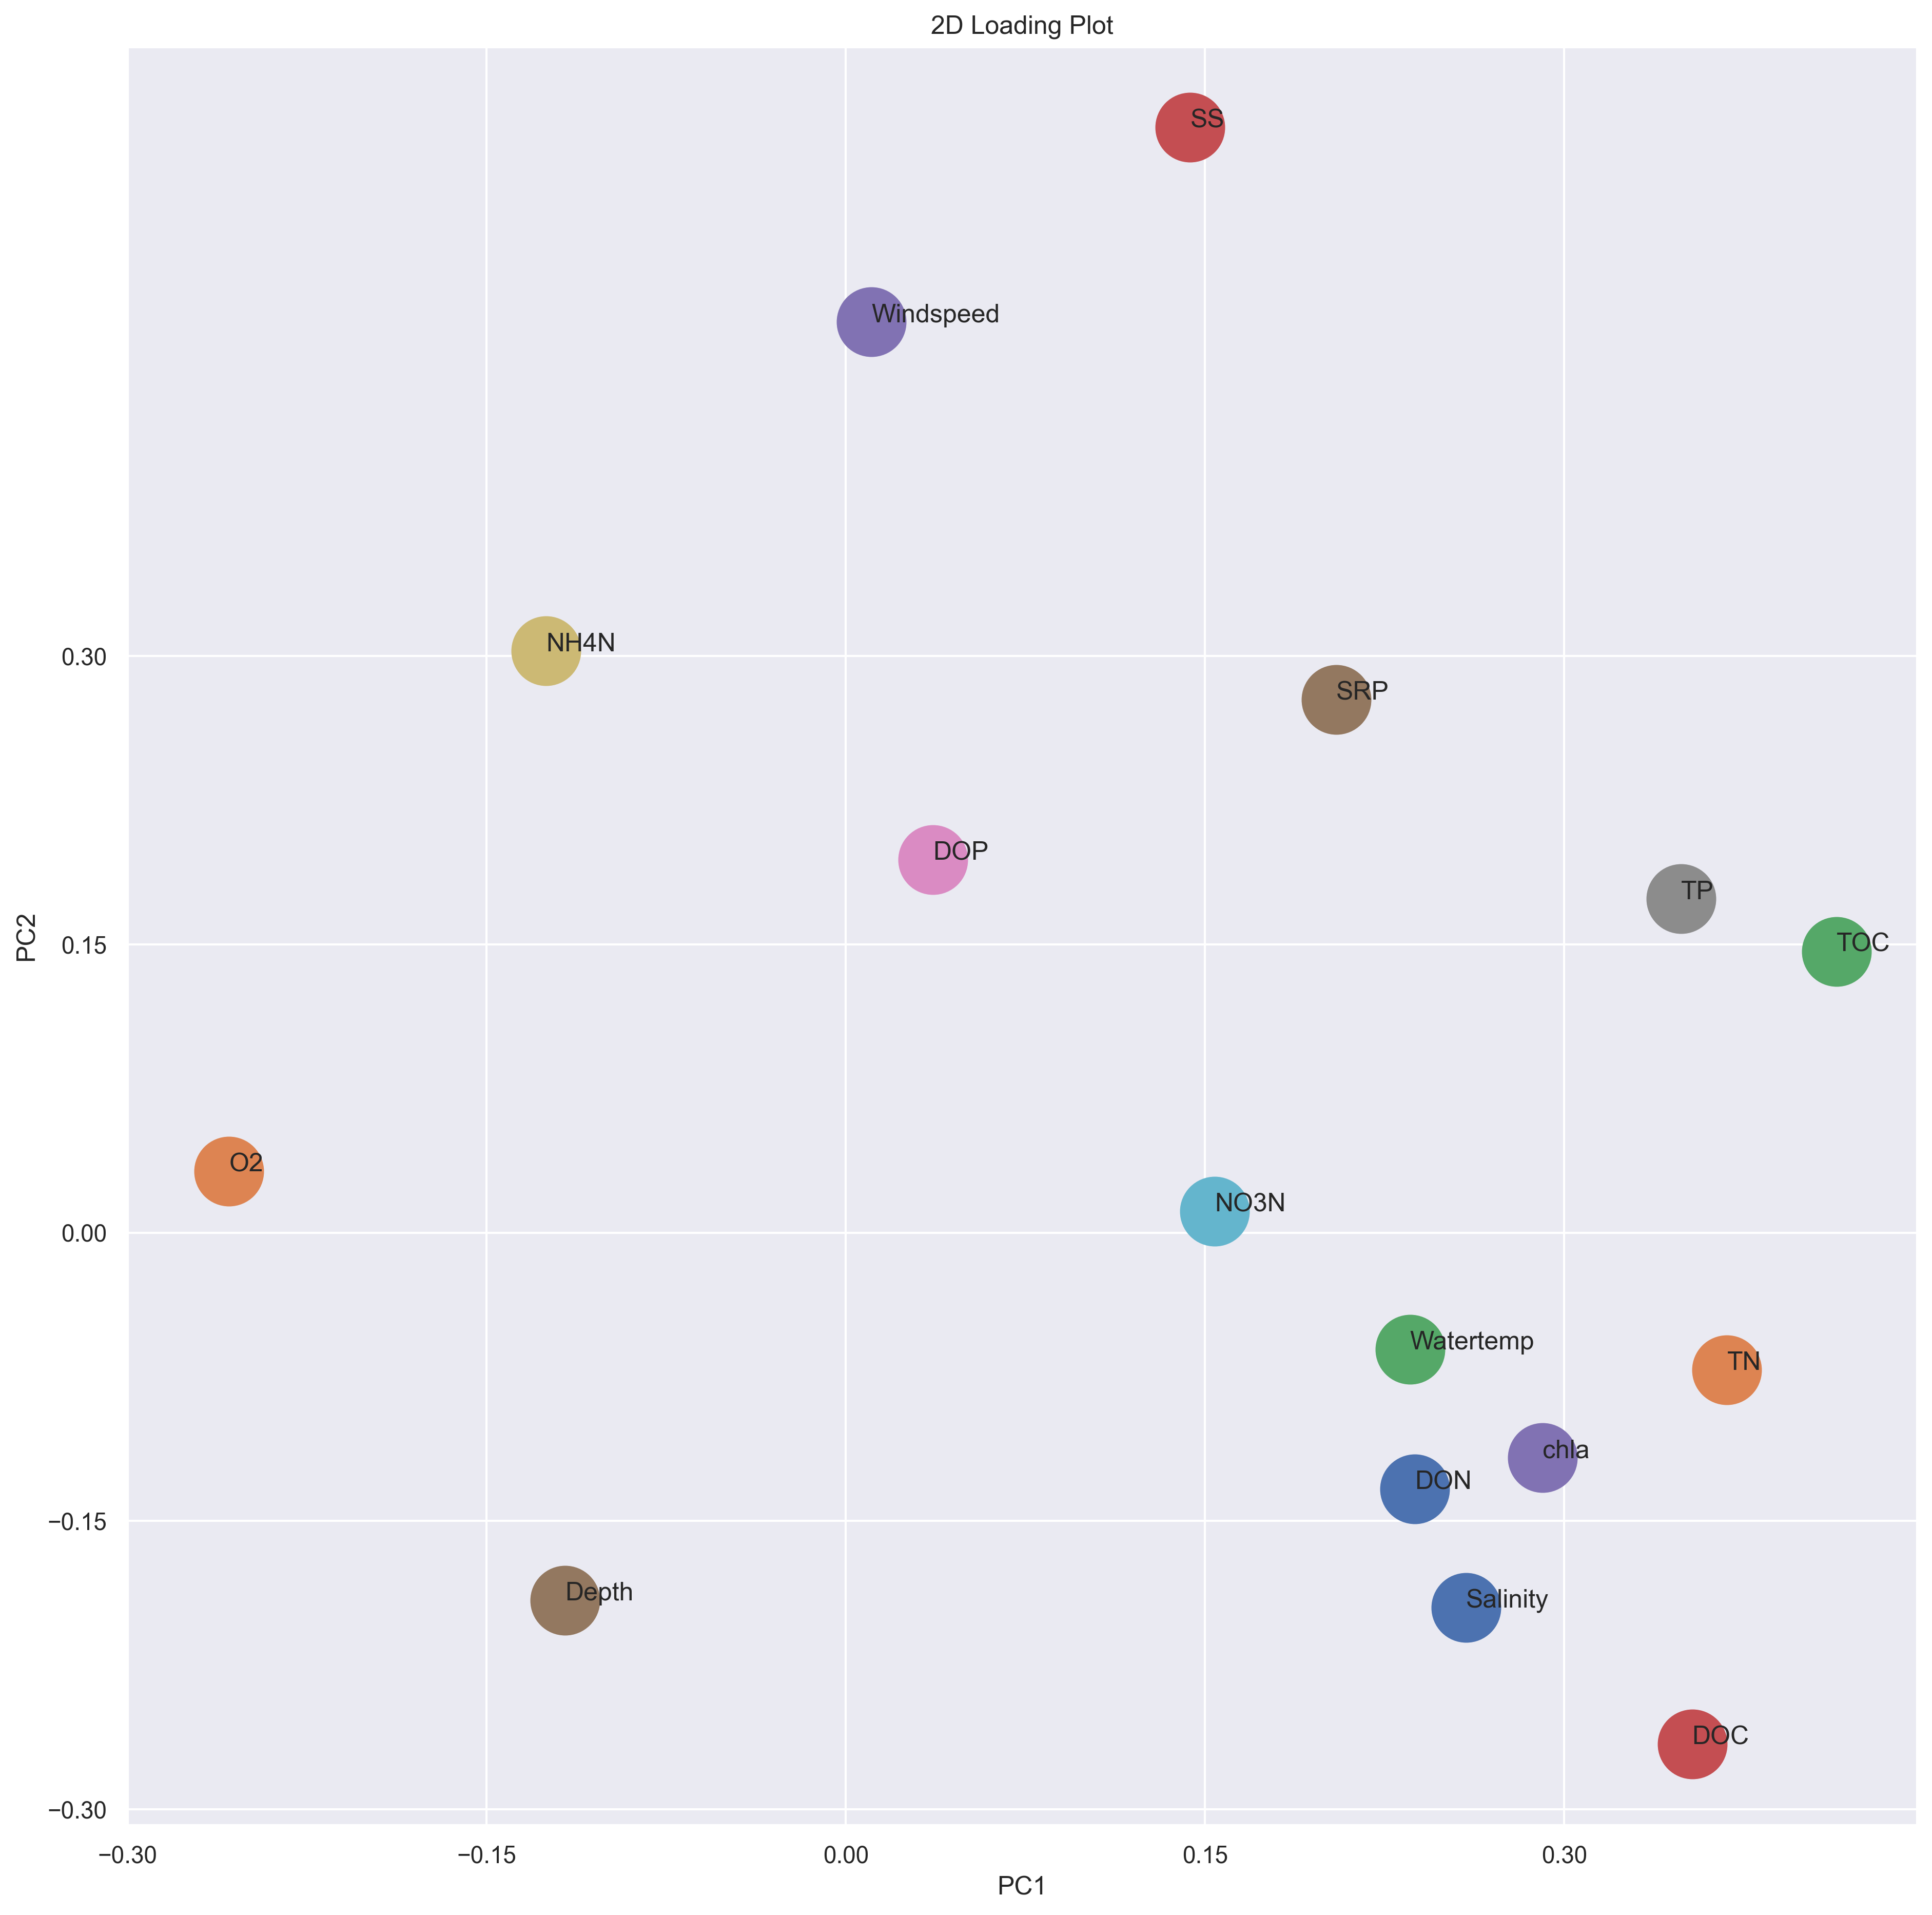

In [702]:
plt.figure(figsize=(15, 15), dpi=300)

xs = loadings[0]
ys = loadings[1]

for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=1000)
    plt.text(xs[i], ys[i], varnames)

xticks = np.linspace(-0.3, 0.3, num=5)
yticks = np.linspace(-0.3, 0.3, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D Loading Plot')
plt.show()

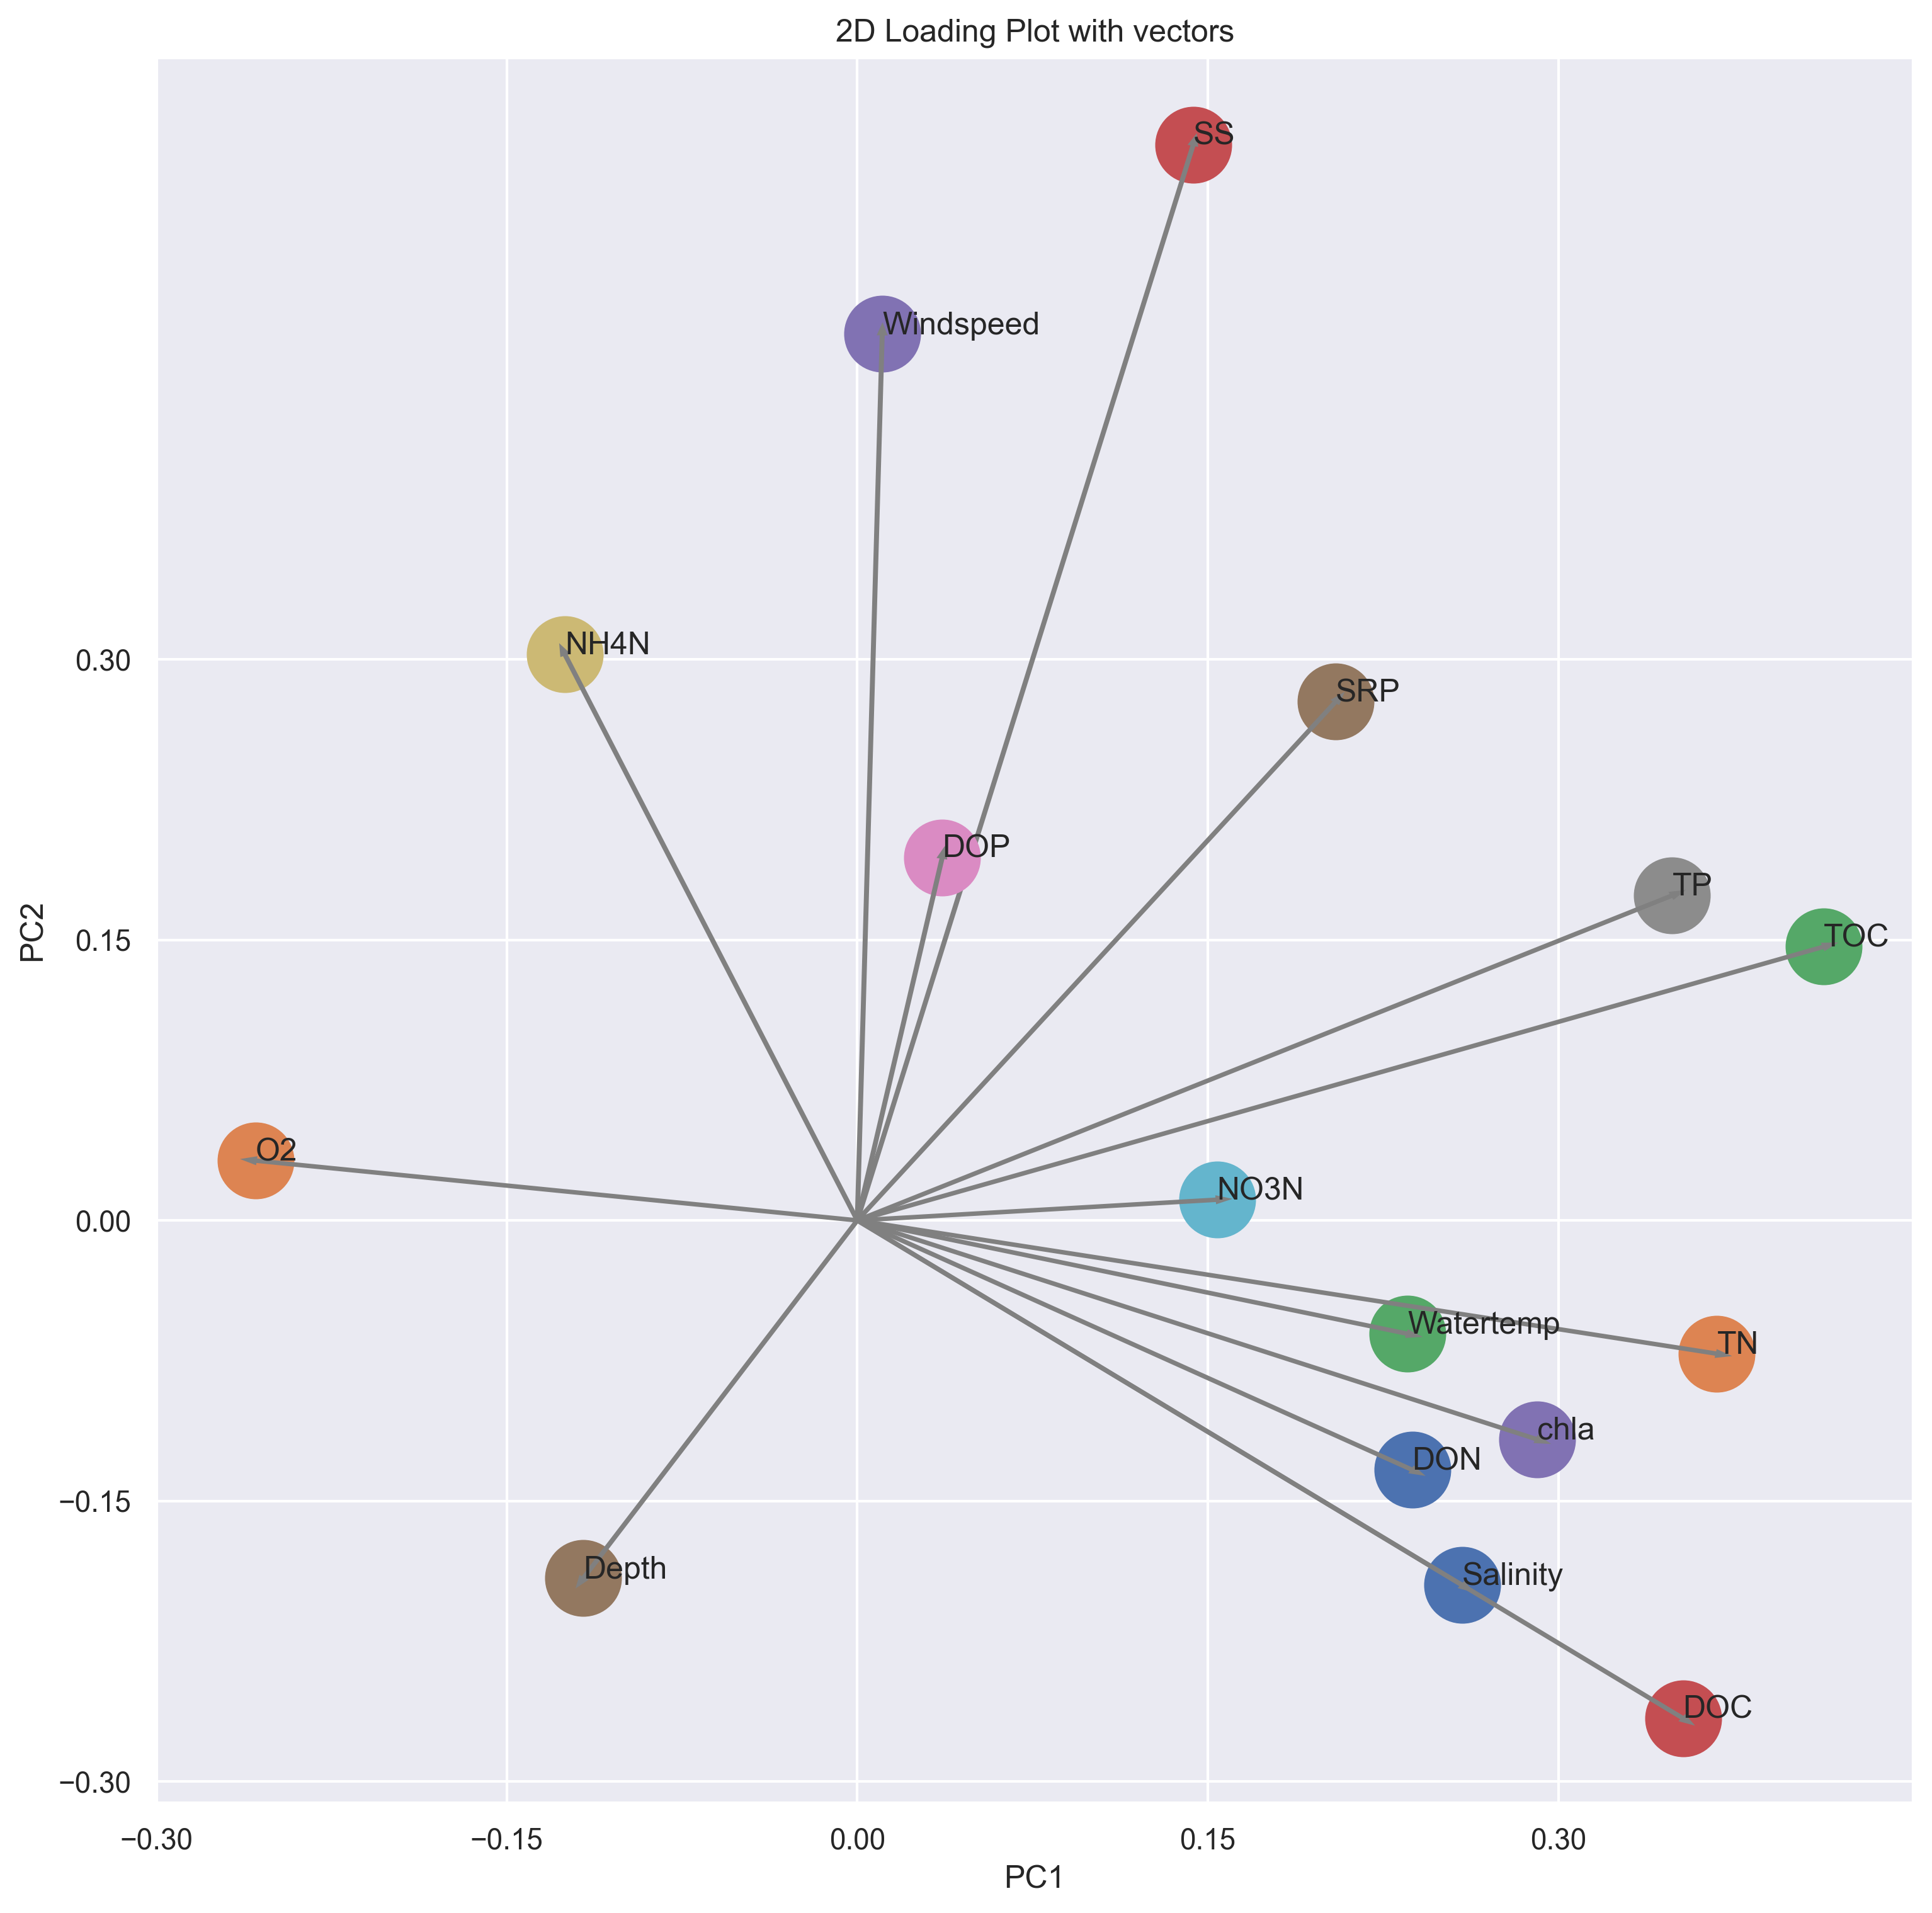

In [703]:
plt.figure(figsize=(12, 12), dpi=300)

for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=800)
    plt.arrow(
        0, 0,
        xs[i],
        ys[i],
        color='grey',
        linewidth=None,
        head_width=None,
    )
    plt.text(xs[i], ys[i], varnames)

plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.title('2D Loading Plot with vectors')
plt.show()

PCA dla WEST

In [704]:
west_data_sc = StandardScaler().fit_transform(west_data)
pd.DataFrame(west_data_sc, columns=east_data.columns).head(6)

,Salinity,O2,Watertemp,SS,chla,SRP,DOP,TP,NH4N,NO3N,DON,TN,TOC,DOC,Windspeed,Depth
0,0.852046,-0.758367,0.167001,-0.833419,-1.254619,-0.939155,0.024743,-0.895277,-0.773801,-1.533015,-0.237358,-0.776563,-0.603744,-0.276792,-1.458613,1.021181
1,-0.009675,-0.098224,0.622004,-1.242667,-1.351686,-0.866119,-0.002516,-1.084301,-0.104957,-0.876452,0.395978,-0.145893,-0.598147,-0.597745,-1.823969,0.145498
2,-0.655965,1.033451,0.459503,-1.368590,-1.545524,-0.374784,0.433638,-1.161033,-0.372495,0.487177,-1.372799,-0.069293,-0.565580,-0.906811,-1.823969,0.320635
3,0.205756,-0.758367,0.004500,-0.833419,-1.545524,-0.666929,-0.405959,-2.059362,0.296349,-1.078472,0.538621,-0.339945,-0.889215,-0.602698,0.002810,0.670908
4,-0.536282,1.561566,0.687004,-0.424170,-1.448457,-0.633731,-0.476834,-0.835389,-0.840685,-0.724938,-1.795023,0.602231,-0.515508,-0.243112,-1.458613,-1.605868
5,0.349376,-0.984702,0.069500,-0.864899,-1.254619,-0.075999,0.837080,-1.179748,0.028812,-0.775443,-1.161687,-0.771457,-0.863569,-1.300077,-0.362546,1.021181


In [705]:
pca = PCA(n_components=3)
pca_features = pca.fit_transform(west_data_sc)

print('Shape before PCA: ', west_data.shape)
print('Shape after PCA: ', pca_features.shape)

Shape before PCA:  (65, 16)
Shape after PCA:  (65, 3)


In [706]:
pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2', 'PC3'])
pca_df

,PC1,PC2,PC3
0,-1.597526,-2.086027,0.170226
1,-1.446080,-1.729800,0.402303
2,-2.221603,-0.954130,1.137094
3,-2.009707,-1.482750,-0.194723
4,-1.887711,0.062519,-0.258168
...,...,...,...
60,-0.147428,0.985616,0.781697
61,0.456308,0.986130,-0.298180
62,1.420530,0.706864,-1.172502
63,1.391580,2.419908,-1.453557


In [707]:
explained_variance = pca.explained_variance_
print(f'Explained Variance Ratios: {explained_variance}')

Explained Variance Ratios: [4.43818532 1.97974774 1.70470362]


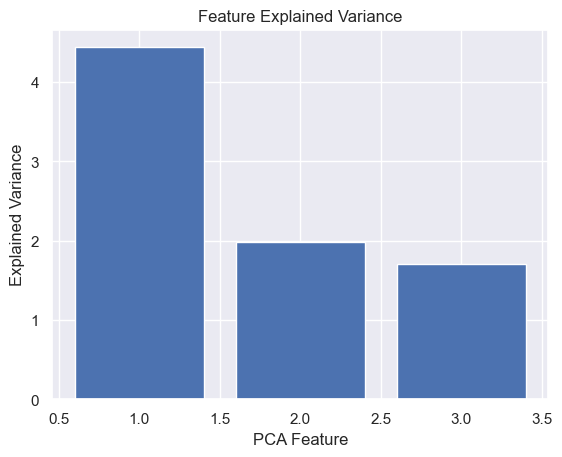

In [708]:
sns.set()

pca = PCA(n_components=3)
pca.fit_transform(west_data_sc)

plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('PCA Feature')
plt.ylabel('Explained Variance')
plt.title('Feature Explained Variance')
plt.show()

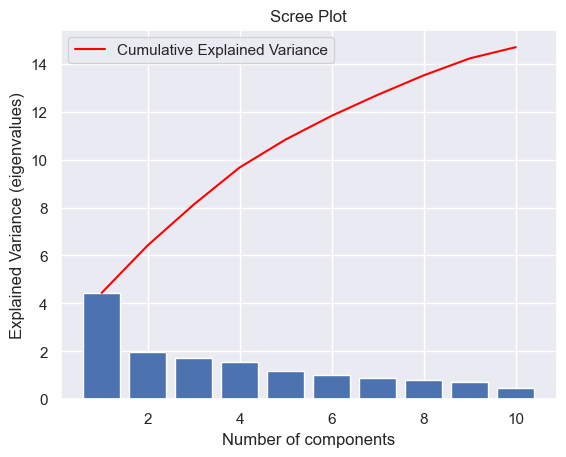

In [709]:
pca = PCA(n_components=10)
pca.fit_transform(west_data_sc)
explained_variance = pca.explained_variance_

plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), c='red', label='Cumulative Explained Variance')
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained Variance (eigenvalues)')
plt.title('Scree Plot')
plt.show()

In [710]:
loadings = pca.components_
n_features = pca.n_features_in_
feature_names = list(west_data.columns)

pc_list = [f'PC{i}' for i in list(range(1, n_features - 1))]
pc_loadings = dict(zip(pc_list, loadings))

loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
feature_names,,,,,,,,,,
Salinity,0.253832,-0.140558,0.388895,0.277997,-0.103750,-0.030733,-0.149687,-0.372578,-0.035596,0.261714
O2,-0.235327,0.288579,0.292991,-0.370039,0.245618,-0.023819,0.171058,-0.046375,-0.145066,0.128823
Watertemp,0.110282,-0.378973,-0.019076,-0.295120,-0.367257,0.276344,-0.272053,0.428253,0.118410,0.326328
SS,0.104636,0.421018,-0.212313,0.287142,-0.084332,0.310762,-0.425128,0.110338,0.209929,-0.114384
chla,0.268325,-0.047416,0.179686,-0.180286,-0.290495,-0.032947,0.332560,-0.206363,0.643745,0.026597
SRP,0.194080,0.343397,0.180966,-0.303649,-0.207208,-0.148680,0.213506,0.498120,-0.172911,-0.010254
DOP,0.180869,-0.039354,-0.036992,-0.269884,-0.020908,0.741411,0.119683,-0.259689,-0.394795,-0.094807
TP,0.351688,0.298431,-0.066186,0.036075,0.179538,-0.058546,-0.090837,0.240555,0.075634,0.004524
NH4N,0.003211,0.327836,0.499899,0.165000,-0.352462,0.139605,0.026814,-0.073023,-0.031526,-0.223932


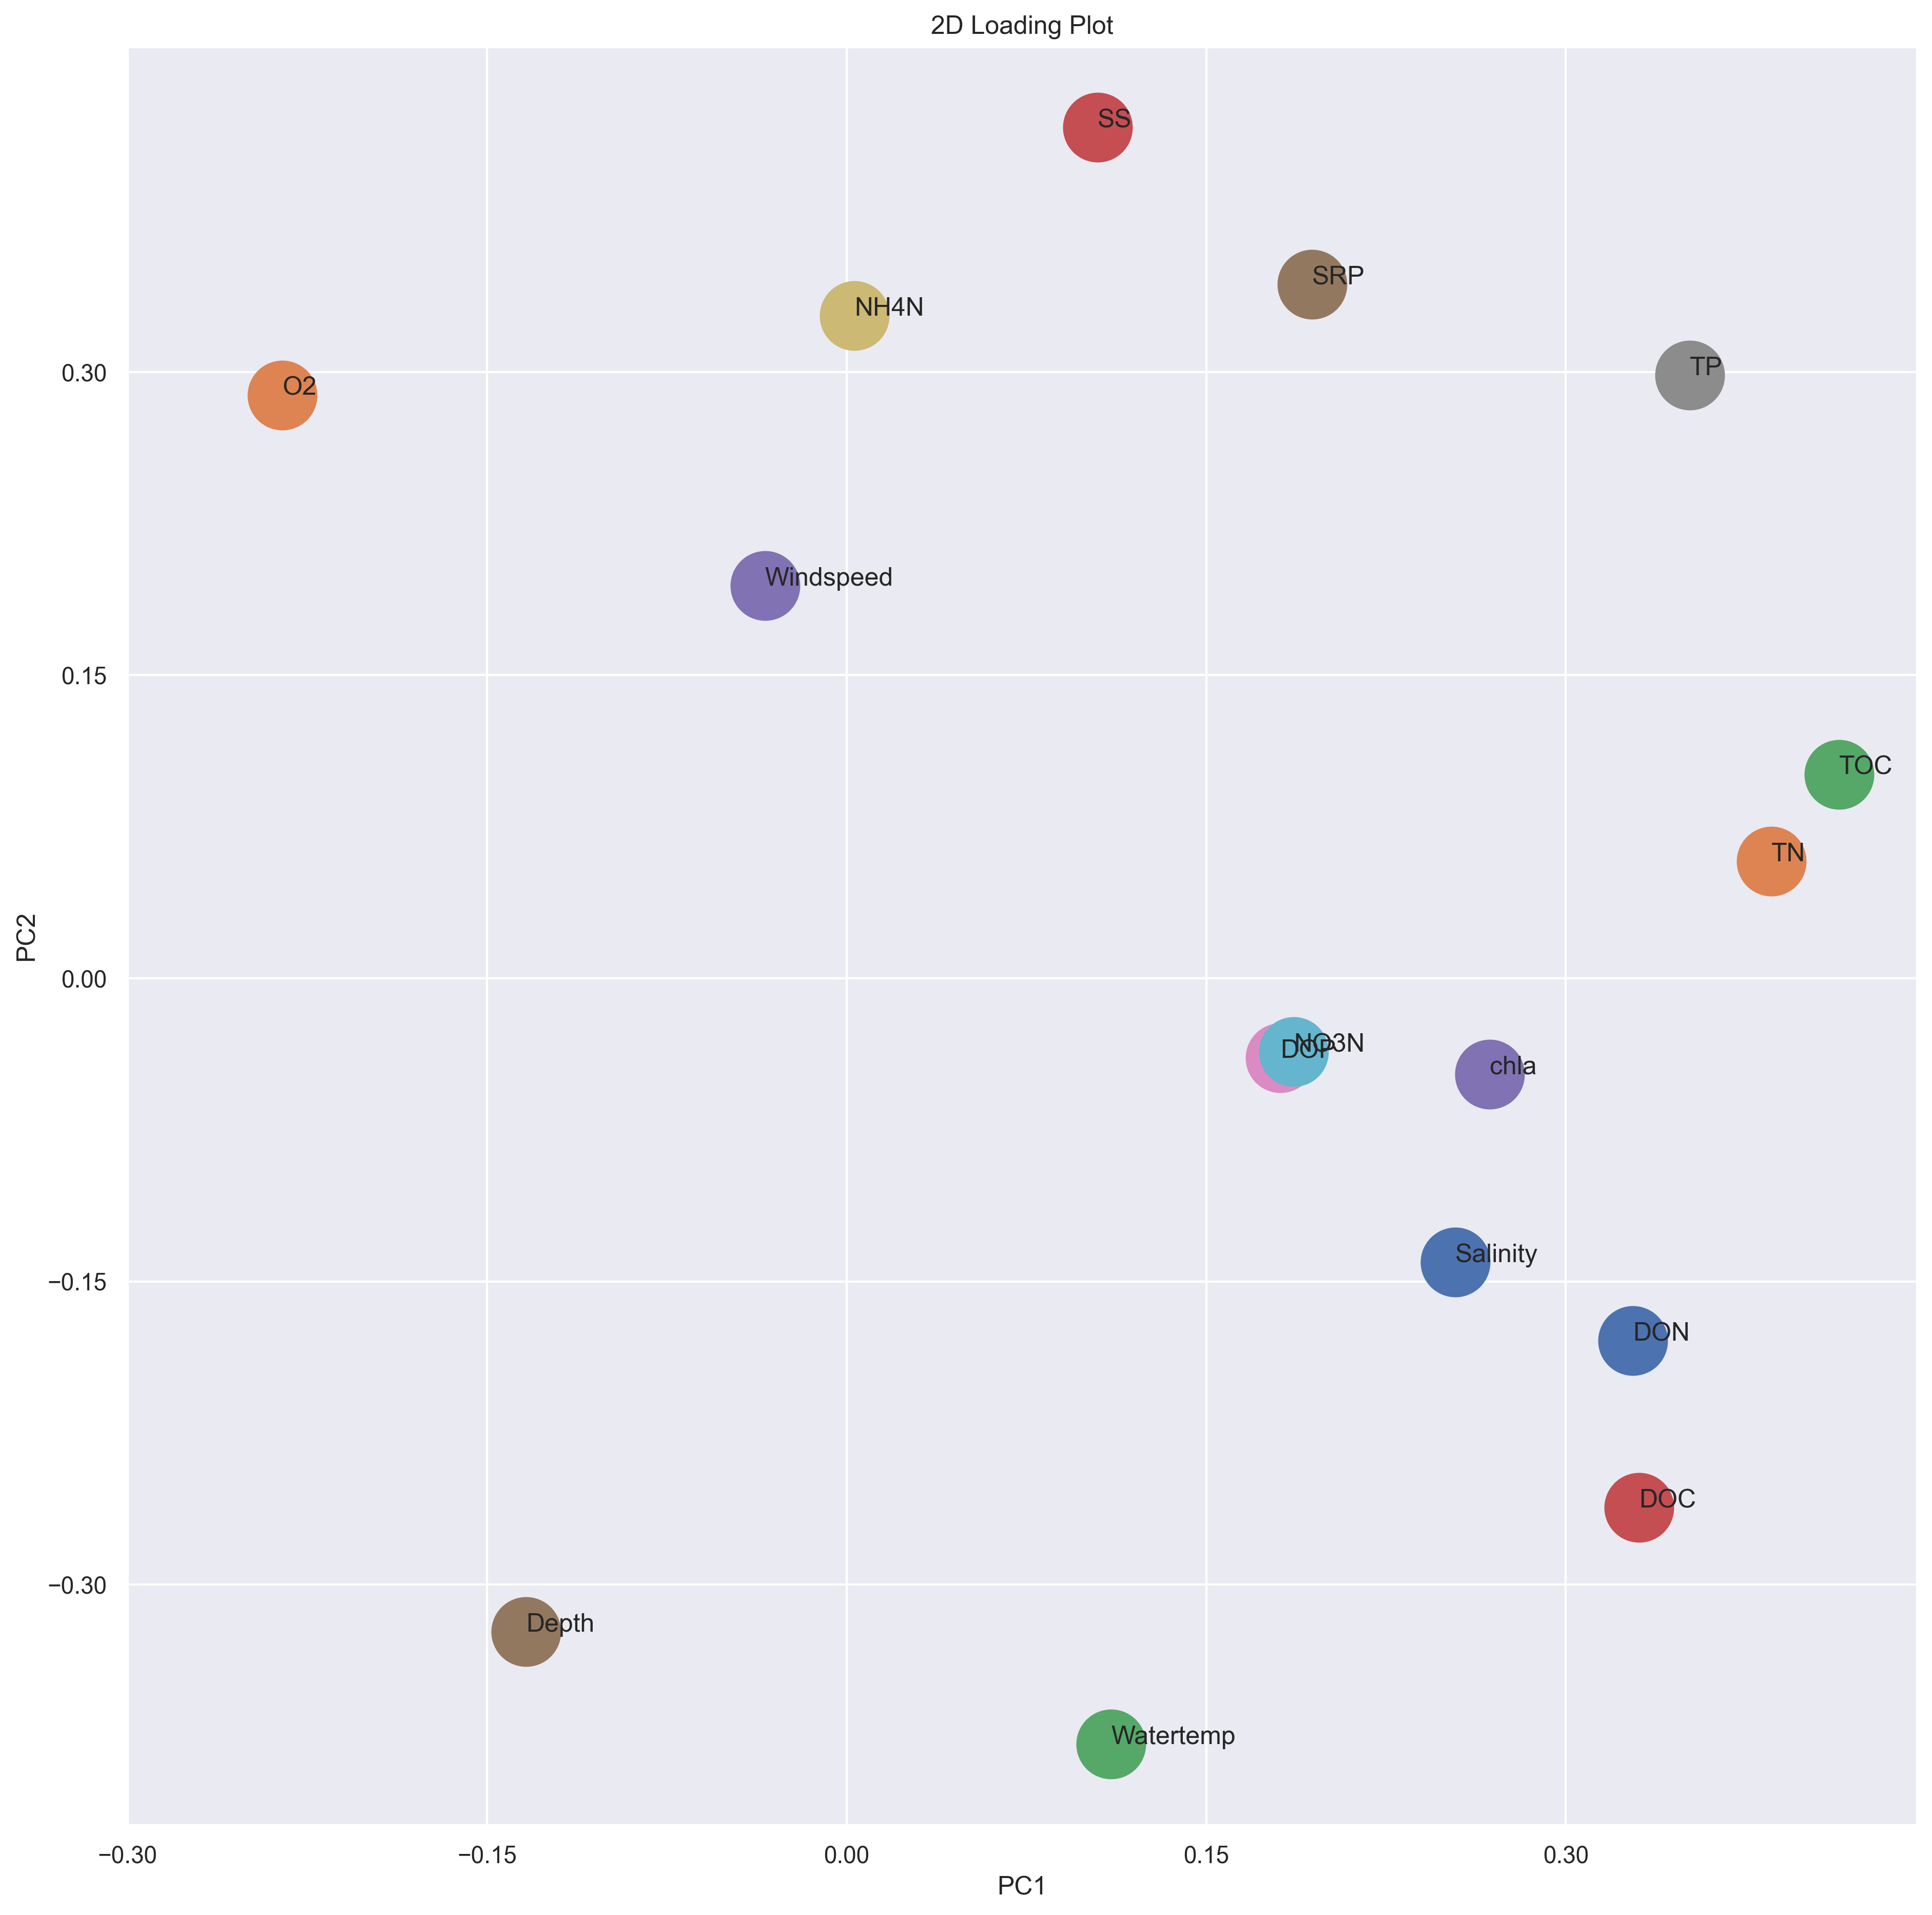

In [711]:
plt.figure(figsize=(15, 15), dpi=300)

xs = loadings[0]
ys = loadings[1]

for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=1000)
    plt.text(xs[i], ys[i], varnames)

xticks = np.linspace(-0.3, 0.3, num=5)
yticks = np.linspace(-0.3, 0.3, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D Loading Plot')
plt.show()

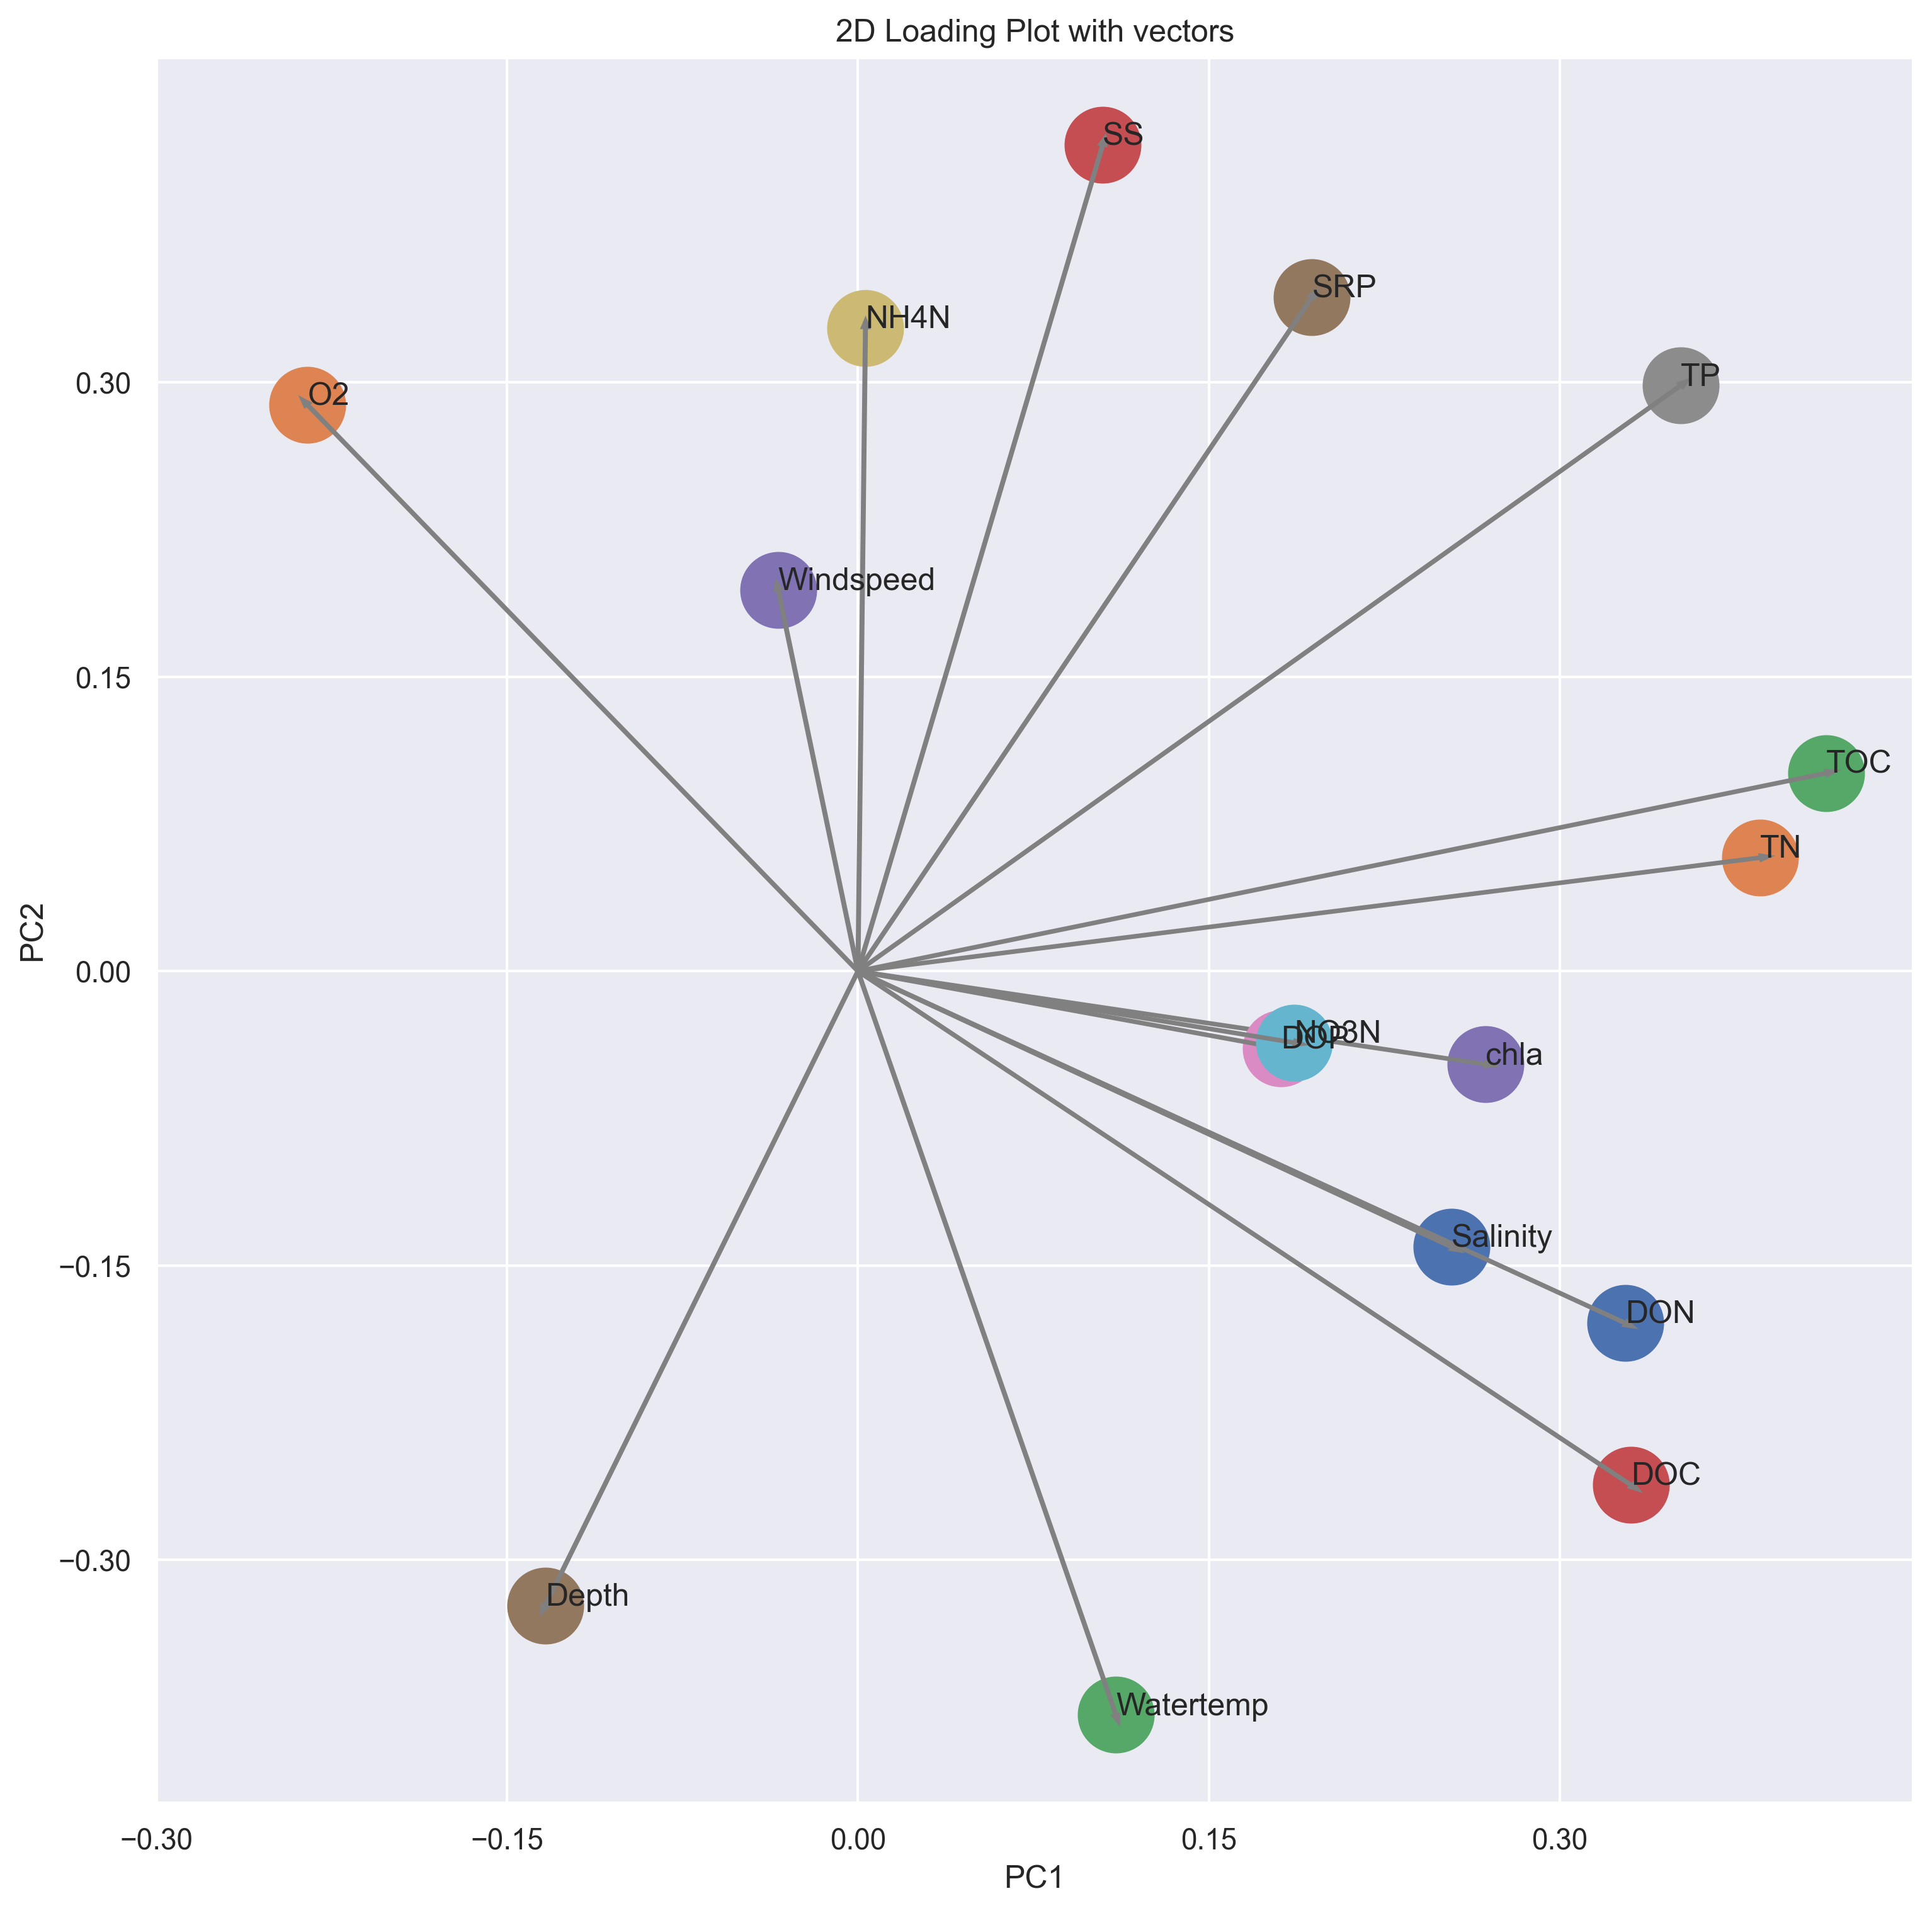

In [712]:
plt.figure(figsize=(12, 12), dpi=300)

for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=800)
    plt.arrow(
        0, 0,
        xs[i],
        ys[i],
        color='grey',
        linewidth=None,
        head_width=None,
    )
    plt.text(xs[i], ys[i], varnames)

plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.title('2D Loading Plot with vectors')
plt.show()

Pytanie: Jakie są różnice między EAST i WEST w dwóch głównych Eigenvalues i rozkładzie graficznym tych samych zmiennych środowiskowych?

W east pierwszy eigenvalue jest mniejszy od pierwszego w west, ale za to drugi jest większy.